# CO2 Emissions versus GDP



In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wbdata
import plotly.graph_objects as go
import random
import datetime

# Define datasets to retrieve from the World Bank API
indicators = {'EN.ATM.CO2E.KT':'CO2 Emissions', 'NY.GDP.MKTP.CD':'GDP', 'SP.POP.TOTL':'Population' }

# Build Country List
countries = wbdata.get_country(display=False)  

country_list = []
country_names = []
color_list = []
i = 0

for country in countries:
    if country['region']['value'] != 'Aggregates':
        country_list.append(country['id'])
        country_names.append(country['name'])
        color_list.append(random.randint(1,255))
        
country_df = pd.DataFrame(country_list)

# Retrieve World Bank data
data = wbdata.get_dataframe(indicators,country=country_list,data_date=False,convert_date=False,keep_levels=True) 

# Aggregate the data by Country
last_df = pd.DataFrame(data.groupby(['country']).agg(
    {
        'CO2 Emissions':'max',
        'GDP':'max',
        'Population':'max'  
    })).reset_index()


last_df['Global CO2 %'] = (last_df['CO2 Emissions']/last_df['CO2 Emissions'].sum())*100

sorted_df = last_df.sort_values(by=['Global CO2 %'], ascending=False).reset_index()

# Filter out bad data (report later)
last_df = last_df.dropna()

# Build the Bubble Chart
area = 500
x = last_df['GDP']
y = last_df['Global CO2 %']
z = last_df['CO2 Emissions']

sizeref = 2.*max(z)/(100**2)

fig = go.Figure()

hover_text = []
name_list = []
for index, row in last_df.iterrows():

    hover_text.append(('Country: {country}<br>'+
                      'CO2 (kt): {CO2:,.6f}<br>'+
                      'CO2 (%): {CO2PCT:,.2f}<br>'+
                      'CO2 per capita (kt): {CO2PPP:,.6f}<br>'+
                      'GDP per capita ($): {gdp:,.0f}<br>'+
                      'Population: {pop:,.0f}<br>').format(country=row['country'],
                                            CO2=row['CO2 Emissions'],
                                            CO2PCT=row['Global CO2 %'],
                                            CO2PPP=row['CO2 Emissions']/row['Population'],
                                            gdp=row['GDP'],
                                            pop=row['Population']))

# Create figure
fig = go.Figure(data=[go.Scatter(
    x=x, y=y,
    mode='markers',
    text=hover_text,
    marker=dict(
        color=color_list,
        size=z,
        sizemode='area',
        sizeref=sizeref,
        sizemin=4)
)])

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Carbon Dioxide Emissions vs GDP',
    showlegend=False,
    xaxis=dict(
        title='GDP',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='CO2 Emissions %',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()


# Save Figure
fig.write_image("CO2vsGDP.png")


In [3]:

sorted_df = last_df.sort_values(by=['CO2 Emissions'], ascending=False)
sorted_df['CO2 Emissions'] = sorted_df['CO2 Emissions'].map('{:,.0f}'.format)
sorted_df['GDP'] = sorted_df['GDP'].map('${:,.0f}'.format)
sorted_df['Population'] = sorted_df['Population'].map('{:,.0f}'.format)
sorted_df = sorted_df.rename(columns={"country":"Country", "CO2 Emissions": "CO2 Emissions (kt)", "GDP": "GDP (current $)"})
sorted_df.head(20)


,Country,CO2 Emissions (kt),GDP (current $),Population,Global CO2 %
41,China,"10,291,927","$13,608,151,864,638","1,392,730,000",27.385822
206,United States,"5,789,727","$20,494,099,845,390","327,167,434",15.405904
89,India,"2,238,377","$2,726,322,616,821","1,352,617,328",5.956105
161,Russian Federation,"2,078,668","$2,297,128,039,058","148,689,000",5.531135
98,Japan,"1,266,010","$6,203,213,121,334","128,070,000",3.368729
73,Germany,"929,973","$3,996,759,291,058","82,927,922",2.474569
205,United Kingdom,"660,863","$3,084,117,647,059","66,488,991",1.758493
91,"Iran, Islamic Rep.","649,481","$598,853,401,276","81,800,269",1.728205
90,Indonesia,"637,079","$1,042,173,300,626","267,663,435",1.695205
203,Ukraine,"630,929","$183,310,146,378","52,179,210",1.678842


# ESG Score

Beginning ESG Score Calculation
End of ESG Index Calculation


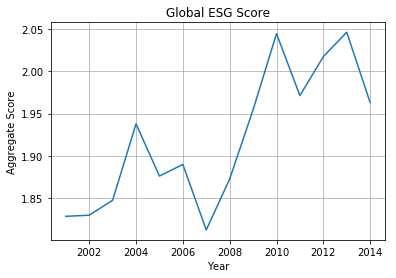

In [186]:
import datetime

environmental_indicators = {'EN.ATM.CO2E.KT':'CO2 Emissions', 'SP.POP.TOTL':'Population'}
social_indicators = {'SL.TLF.ACTI.ZS':'Child Labor', 'SP.POP.TOTL':'Population'}
governance_indicators = {'SE.XPD.TOTL.GD.ZS':'Political Stability', 'SP.POP.TOTL':'Population'}
scaling_indicators = {'NY.GDP.MKTP.CD':'GDP', 'SP.POP.TOTL':'Population'}

print("Beginning ESG Score Calculation")

env_df = pd.DataFrame(columns = ['Year', 'Country','Score','Weight']) 
env_history = []
soc_df = pd.DataFrame(columns = ['Year', 'Country','Score','Weight']) 
soc_history = []
gov_df = pd.DataFrame(columns = ['Year', 'Country','Score','Weight']) 
gov_history = []
esg_history = []

# Build the Environmental SubIndex

# Loop through each Year
i = 0
x = []
envlogfile = open("envlog.csv", "w")
envlogfile.write(f"Type,Year,Country,Score,Population,Weight,Global CO2 %,Incremental Year Agg Score\n")

for year in range(2001,2015,1):

    # Set the Date Range for the Year
    data_dates = (datetime.datetime(year,1,1), datetime.datetime(year,12,31))
   
    # Collect Environmental Data
#    print(f"\nRetrieving Environmental Data for Year: {year}")

    environmental_df = wbdata.get_dataframe(environmental_indicators,country=country_list,data_date=data_dates, convert_date=True,keep_levels=True) 
    environmental_df = environmental_df.dropna()
    environmental_df['Global CO2 %'] = environmental_df['CO2 Emissions'].groupby(level=1).apply(lambda g: ( (g / g.sum())*100))
    
    # Calculate Country Environmental Scores
    sorted_df = environmental_df.sort_values(by=['Global CO2 %'], ascending=False).reset_index()

    # Calculate the Global Population of the countries available for these series
    global_population = environmental_df['Population'].sum()

    # Iterate through all of the Country Data
    year_agg_score = 0
    population_adjustment = 0
    for index, row in sorted_df.iterrows():  

        score = 0
        if row['Global CO2 %'] < 1: score = 1
        if row['Global CO2 %'] >= 1 and row['Global CO2 %'] < 4: score = 2
        if row['Global CO2 %'] >= 4 and row['Global CO2 %'] < 6: score = 3
        if row['Global CO2 %'] >= 6 and row['Global CO2 %'] < 10: score = 4
        if row['Global CO2 %'] >= 10: score = 5
        envlogfile.write(f"YEARCNTY,{year},{row['country'].replace(',','|')},{score},{row['Population']},{row['Population']/(global_population)},{row['Global CO2 %']},{year_agg_score}\n")
        env_country_df = {'Year':year, 'Country':row['country'], 'Score':score,'Weight':row['Population']/(global_population)}
        env_df = env_df.append(env_country_df, ignore_index = True)
        year_agg_score = year_agg_score + (score * row['Population']/(global_population))
        
    x.append(year)
    envlogfile.write(f"YEARTOTL,{year},{len(sorted_df)},{year_agg_score}\n")
        
    # Append the Weighted Score for the year to env_history
    env_history.append(year_agg_score)  

envlogfile.close()
                         
plt.xlabel('Year')
plt.ylabel('Environmental Score')
plt.title('ESG Environmental Score')                         
plt.plot(x, env_history)
#plt.show()
plt.grid()
plt.savefig("ESGEnvironmentIndex.png")
plt
plt.clf()

                         

# Build the Social SubIndex
        
                         
# Loop through each Year
i = 0
x = []
soclogfile = open("soclog.csv", "w")
soclogfile.write(f"Type,Year,Country,Score,Population,Weight,Global Child Labor %,Incremental Year Agg Score\n")

for year in range(2001,2015,1):

    # Collect Social Data
#    print(f"\nRetrieving Social Data for Year: {year}")

    # Set the Date Range for the Year
    data_dates = (datetime.datetime(year,1,1), datetime.datetime(year,12,31))
              
    social_df = wbdata.get_dataframe(social_indicators, country=country_list,data_date=data_dates, convert_date=True,keep_levels=True) 
    social_df = social_df.dropna()   
    social_df['Global Child Labor %'] = social_df['Child Labor'].groupby(level=1).apply(lambda g: ( (g / g.sum())*100))
                 
    # Calculate Country Social Scores
    sorted_df = social_df.sort_values(by=['Global Child Labor %'], ascending=True).reset_index()

    # Calculate the Global Population of the countries available for these series
    global_population = social_df['Population'].sum()

    # Iterate through all of the Country Data
    year_agg_score = 0
    population_adjustment = 0
           
    for index, row in sorted_df.iterrows():  

        score = 0
        if row['Global Child Labor %'] >= 0.6: score = 1
        if row['Global Child Labor %'] >= 0.55 and row['Global Child Labor %'] < 0.6: score = 2
        if row['Global Child Labor %'] >= 0.45 and row['Global Child Labor %'] < 0.55: score = 3
        if row['Global Child Labor %'] >= 0.4 and row['Global Child Labor %'] < 0.45: score = 4
        if row['Global Child Labor %'] < 0.4: score = 5
        soclogfile.write(f"YEARCNTY,{year},{row['country'].replace(',','|')},{score},{row['Population']},{row['Population']/(global_population)},{row['Global Child Labor %']},{year_agg_score}\n")
        soc_country_df = {'Year':year, 'Country':row['country'], 'Score':score,'Weight':row['Population']/(global_population)}
        soc_df = soc_df.append(soc_country_df, ignore_index = True)
        year_agg_score = year_agg_score + (score * row['Population']/(global_population))
        
    x.append(year)
    soclogfile.write(f"YEARTOTL,{year},{len(sorted_df)},{year_agg_score}\n")
        
    # Append the Weighted Score for the year to env_history
    soc_history.append(year_agg_score)  

soclogfile.close()
                         
plt.xlabel('Year')
plt.ylabel('Social Score')
plt.title('ESG Social Score')                         
plt.plot(x, soc_history)
plt.grid()
#plt.show()
plt.savefig("ESGSocialIndex.png")
plt
plt.clf()

                         
# Build the Governance SubIndex
        
          
                         
# Loop through each Year
i = 0
x = []
govlogfile = open("govlog.csv", "w")
govlogfile.write(f"Type,Year,Country,Score,Population,Weight,Political Stability %,Incremental Year Agg Score\n")

for year in range(2001,2015,1):
    
    # Collect Governance Data
#    print(f"\nRetrieving Governance Data for Year: {year}")

    # Set the Date Range for the Year
    data_dates = (datetime.datetime(year,1,1), datetime.datetime(year,12,31))
              
    governance_df = wbdata.get_dataframe(governance_indicators,country=country_list,data_date=data_dates, convert_date=True,keep_levels=True) 
    governance_df = governance_df.dropna()
    governance_df['Political Stability %'] = governance_df['Political Stability'].groupby(level=1).apply(lambda g: ( (g / g.sum())*100))
    
    # Calculate Country Governance Scores
    sorted_df = governance_df.sort_values(by=['Political Stability %'], ascending=True).reset_index()

    # Calculate the Global Population of the countries available for these series
    global_population = social_df['Population'].sum()

    # Iterate through all of the Country Data
    year_agg_score = 0
    population_adjustment = 0
               
    for index, row in sorted_df.iterrows():  

        score = 0
        if row['Political Stability %'] >= 0.6: score = 1
        if row['Political Stability %'] >= 0.55 and row['Political Stability %'] < 0.6: score = 2
        if row['Political Stability %'] >= 0.45 and row['Political Stability %'] < 0.55: score = 3
        if row['Political Stability %'] >= 0.4 and row['Political Stability %'] < 0.45: score = 4
        if row['Political Stability %'] < 0.4: score = 5
        govlogfile.write(f"YEARCNTY,{year},{row['country'].replace(',','|')},{score},{row['Population']},{row['Population']/(global_population)},{row['Political Stability %']},{year_agg_score}\n")
        gov_country_df = {'Year':year, 'Country':row['country'], 'Score':score,'Weight':row['Population']/(global_population)}
        gov_df = gov_df.append(gov_country_df, ignore_index = True)
        year_agg_score = year_agg_score + (score * row['Population']/(global_population))
        
    x.append(year)
    govlogfile.write(f"YEARTOTL,{year},{len(sorted_df)},{year_agg_score}\n")
        
    # Append the Weighted Score for the year to env_history
    gov_history.append(year_agg_score)  

govlogfile.close()
                         
plt.xlabel('Year')
plt.ylabel('Governance Score')
plt.title('ESG Governance Score')                         
plt.plot(x, gov_history)
plt.grid()
#plt.show()
plt.savefig("ESGGovernmentIndex.png")
plt
plt.clf()



# Calculate Global Aggregate ESG Index
                         

x = []
i = 0
                         
for year in range(2001,2015,1):
        
    x.append(year)
    esg_history.append(1/3 * env_history[i] + 1/3 * soc_history[i] + 1/3 * gov_history[i])  
    i = i + 1

                         
plt.xlabel('Year')
plt.ylabel('Aggregate Score')
plt.title('Global ESG Score')
plt.grid()
                         
plt.plot(x, esg_history)
#plt.show()
plt.savefig("ESGAggregateIndex.png")
plt
    

print("End of ESG Index Calculation")              
              



In [55]:
wbdata.search_indicators("govern")

3.02.01.02.fscov                          	Government finance accounting
5.1.10_ETH.TOTA.AID.JPN                   	International aid disbursed to total education, Japan Government to Ethiopia (USD million) 
5.2.10_ETH.BAS.AID.JPN                    	International aid disbursed to basic education, Japan Government to Ethiopia (USD million) 
D-1.1                                     	(i) Annual deviation of actual budget support from the forecast provided by the donor agencies at least six weeks prior to the government submitting its budget proposals to the legislature (or equivalent approving body)
DAK.GOVT.CR                               	Total Specific Allocation Grant for Government Sector (in IDR Billion)
DB.DOD.DLXF.CD                            	Central Government External Debt (US$)
DL.DOD.CGOV.CD                            	Central Government
DL.DOD.ROGG.CD                            	Rest of General Government
DP.DOD.DECT.CR.BC                         	289.Gross Budgetary Cen